In [0]:
# importing libraries
from PIL import Image
import numpy as np
import pandas as pd
import sys, os, shutil, csv
import fnmatch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models
import cv2

In [0]:
ROOT_DIR='./drive/My Drive/Assignment/'
ROOT_DIR_TRAIN=ROOT_DIR +'/train'
ROOT_DIR_TEST=ROOT_DIR +'val'
TRAIN = 'train.csv'
TEST = 'val.csv'

# Looping through the path and fetching images



In [0]:

# fuctions returns all files of given format within given directory
def createImageFileList(dir, format='.png'):
    fileList = []
    for root, dirs, files in os.walk(dir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)   
    return fileList

# Looping through Training folders 
# Creating trainig and test data


In [0]:
train_folders = np.random.permutation(open(ROOT_DIR +'/'+ TRAIN).readlines())
X = []
y = []
num_images = 0
for folder in range(train_folders.size):
    # Images
    imagepaths = [] # Image paths        
    path = ROOT_DIR_TRAIN+'/'+ train_folders[folder].strip().split(';')[0]
    class_index = int(train_folders[folder].strip().split(';')[2])
    imagepaths = createImageFileList(path)
    # Load each image into X[] & y[]
    for image in imagepaths:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (240,240))
        # Build training example, label
        num_images = num_images + 1
        X.append(img)
        y.append(class_index)

## Reshaping train array  



In [11]:
print("Num Images: ", num_images)
X = np.array(X, dtype='uint8')
X = X.reshape(num_images, 240, 240, 1)
y = np.array(y)

Num Images:  19496


# Splitting test and train data


In [0]:
ts = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [13]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


# 
# Construction of model


In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(240, 240, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(X_train,
          y_train,
          epochs=3,
          batch_size=64,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 15596 samples, validate on 3900 samples
Epoch 1/3
15596/15596 [==============================] - 269s 17ms/step - loss: 3.4433 - accuracy: 0.8706 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 2/3
15596/15596 [==============================] - 267s 17ms/step - loss: 0.0272 - accuracy: 0.9938 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 3/3
15596/15596 [==============================] - 268s 17ms/step - loss: 0.0172 - accuracy: 0.9958 - val_loss: 0.0400 - val_accuracy: 0.9908


# Saving model



In [0]:
model.save('gesture_model.h5')

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)

3900/3900 [==============================] - 9s 2ms/step


In [19]:
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

Test accuracy: 99.08%


# loading saved model


In [95]:
from keras.models import load_model
# load model
model = load_model('gesture_model.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 236, 236, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 118, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

# Reading test images
### Some of the lines in csv has more spaces ..so ignoring them


In [131]:
test_folders = np.random.permutation(open(ROOT_DIR +'/'+ TEST).readlines())
_xTest = []
_yTest = []
num_images_test = 0
print(test_folders.size)

for folder in range(test_folders.size):
  try:
    imagepaths = [] # Image paths   
    fn = test_folders[folder].strip().split(';')
    path = ROOT_DIR_TEST+'/'+ fn[0]
    class_index = int(fn[2])
    
    imagepaths = createImageFileList(path)
    # Load each image into X[] & y[]
    for image in imagepaths:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (240,240))
        # Build training example, label
        num_images_test = num_images_test + 1
        _xTest.append(img)
        _yTest.append(class_index)
  except:
   continue

101


# Resizing  test arrays


In [132]:
print("Num Images: ", num_images_test)
_xTest = np.array(_xTest, dtype='uint8')
_xTest = _xTest.reshape(num_images_test, 240, 240, 1)
_yTest = np.array(_yTest)

Num Images:  3000


# Predicting model

In [0]:
preds = model.predict(_xTest)

In [0]:
pred_classes = model.predict_classes(_xTest)

In [136]:
np.unique(pred_classes)

array([0, 1, 2, 3, 4])

# Confusion Matrix


Text(33.0, 0.5, 'actual')

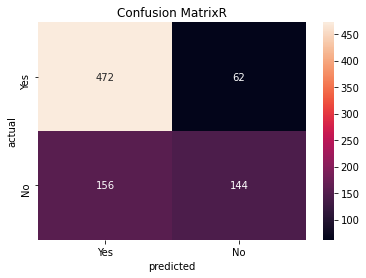

In [140]:
import seaborn as sns
# Confusion metrics  
# the  below diagram represents  as: 
#############
#  TP # FN #
############
#  FP # TN #
###########
# where T True,  F false  N -ve and  P +ve  
#  Precision will be  ( TP / ( TP+FP ) )
#  Recall  will be  ( TP / ( TP + FN ) )
labels = [1,0]
cm = confusion_matrix(_yTest, pred_classes, labels)
sns.heatmap(cm, fmt="0.0f", xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'], annot=True)
plt.title("Confusion MatrixR")
plt.xlabel('predicted')
plt.ylabel('actual') 

In [142]:
print(classification_report(_yTest, pred_classes)) 

              precision    recall  f1-score   support

           0       0.35      0.27      0.30       540
           1       0.55      0.68      0.61       690
           2       0.42      0.38      0.40       660
           3       0.57      0.54      0.56       630
           4       0.38      0.42      0.40       480

    accuracy                           0.47      3000
   macro avg       0.45      0.46      0.45      3000
weighted avg       0.46      0.47      0.46      3000



In [143]:
print(accuracy_score(_yTest, pred_classes))

0.4706666666666667
